## __Why Retrieval Makes or Breaks Your RAG System__

This notebook contains the code examples to demonstrate the challenges in retrieval. Detailed blog post can be accessed <a href="#">here</a>.

In [1]:
!pip3 install numpy matplotlib scipy tqdm


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from scipy.spatial.distance import pdist
from tqdm import tqdm

#### __The Curse of Dimensionality__

Typically, to capture more semantic context in vector embeddings, we move to higher dimensions. However, in high dimensions, everything becomes _roughly_ the same distance from everything else - a counterintuitive phenomenon. To demonstrate this, we conduct a simple experiment:

We measure the ratio of maximum to minimum distances between points in random sets of $D$-dimensional vectors, where $D \in \{2, 4, 6, ..., 2000\}$. This ratio tells us how much farther the most distant points are compared to the closest points. Our simulated vector sets contain 1,000 random vectors generated from a uniform distribution in each dimension.

**Experimental Procedure:**

>For each dimension $D \in \{2, 4, 6, ..., 2000\}$:
>  1. Generate a set $S_D$ of 1,000 random $D$-dimensional vectors from a uniform distribution
>  2. Compute all pairwise Euclidean distances in $S_D$
>  3. Identify the maximum and minimum distances: $d_{\text{max}}$ and $d_{\text{min}}$
>  4. Calculate the ratio $r_D = d_{\text{max}} / d_{\text{min}}$
> 
> Plot $r_D$ across all dimensions on a log scale.

**Expected Result:** As dimensionality increases, the ratio $r_D$ approaches 1, meaning all points become equidistant—illustrating the curse of dimensionality.

In [3]:
dimensions = list(range(2, 2001, 2))
ratios = []
min_dists = []
max_dists = []

for dim in tqdm(dimensions, desc="Computing distances", unit="dim"):
    # Generate 1000 random vectors of a given dimension
    vectors = np.random.rand(1000, dim)

    # Compute pairwise distances once
    dists = pdist(vectors)
    min_dist = float(dists.min())
    max_dist = float(dists.max())
    min_dists.append(min_dist)
    max_dists.append(max_dist)

    # Avoid divide-by-zero; add tiny epsilon if needed
    eps = 1e-12
    ratio = max_dist / (min_dist + eps)
    ratios.append(ratio)

Computing distances: 100%|█████████████████| 1000/1000 [01:57<00:00,  8.52dim/s]


#### Plotting the final results

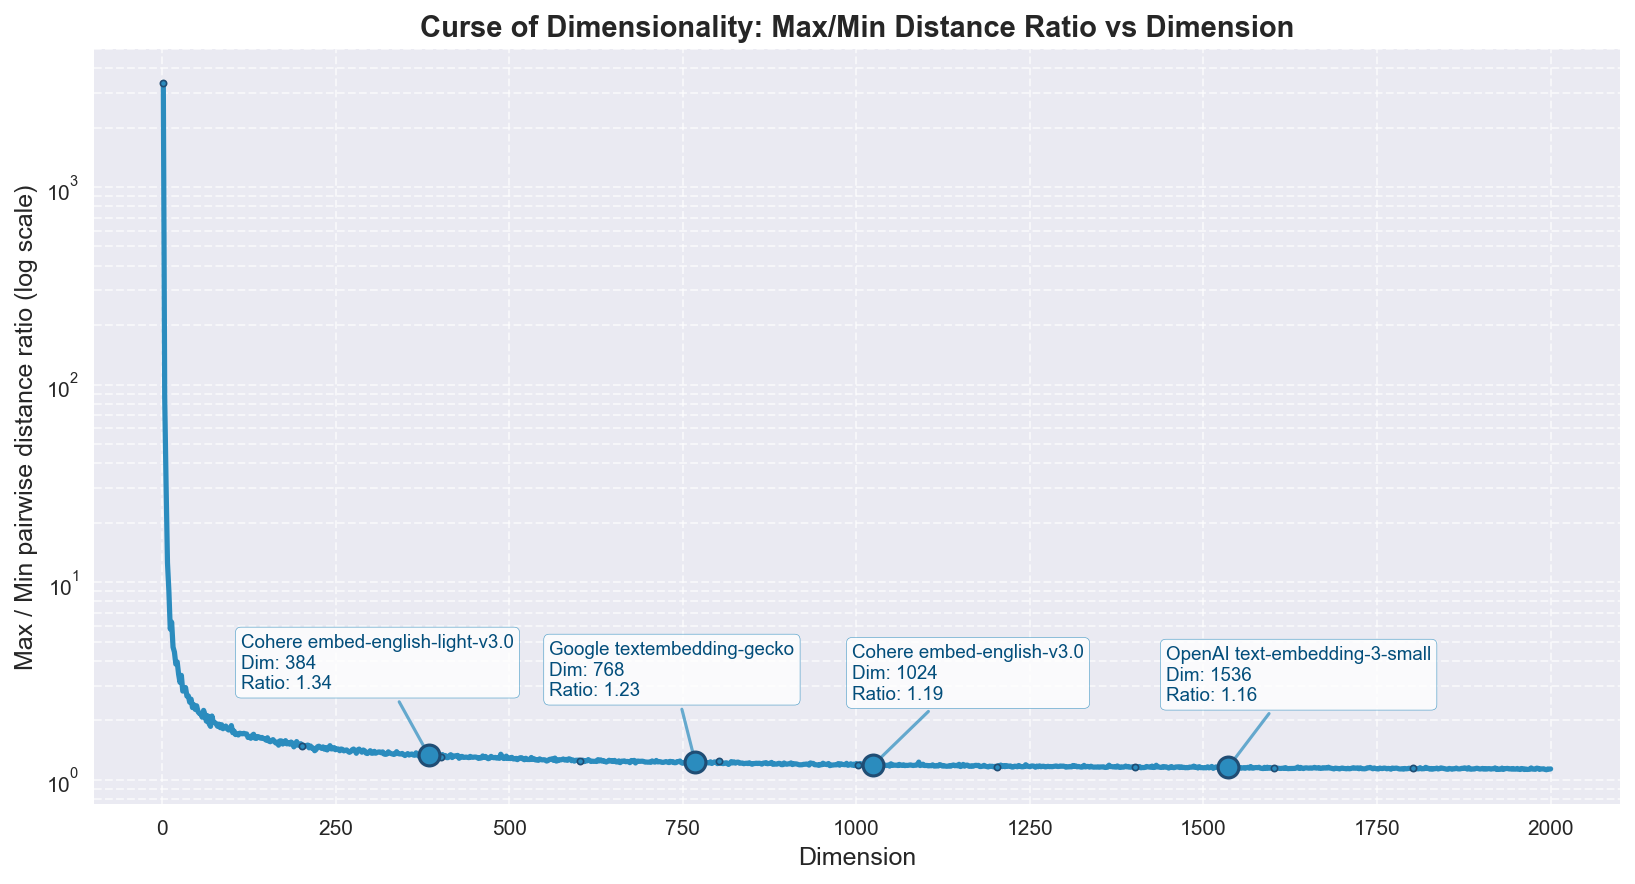

In [5]:
# Presentation-friendly line chart
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(11, 6), dpi=150)

# Plot line chart
ax.plot(dimensions, ratios, color="#2b8cbe", linewidth=2.5, marker='o', 
        markersize=3, markevery=100, markeredgecolor="#204d74", markeredgewidth=0.8)

ax.set_yscale("log")
ax.set_xlabel("Dimension", fontsize=12)
ax.set_ylabel("Max / Min pairwise distance ratio (log scale)", fontsize=12)
ax.set_title("Curse of Dimensionality: Max/Min Distance Ratio vs Dimension", fontsize=14, weight="bold")

# Grid and subtle styling for presentation slides
ax.grid(True, which="both", axis="both", linestyle="--", alpha=0.6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add annotations at key points (beginning, middle, end)
key_indices = [384//2-1, 768//2-1, 1024//2-1, 1536//2-1]
models = [
    "Cohere embed-english-light-v3.0",
    "Google textembedding-gecko",
    "Cohere embed-english-v3.0",
    "OpenAI text-embedding-3-small",
]
annotation_offset = [
    (-90, 30), (-70, 30), (-10, 30), (-30, 30)
]
model_idx = 0
for idx in key_indices:
    ax.scatter(dimensions[idx], ratios[idx], s=100, color="#2b8cbe", 
               edgecolor="#204d74", linewidth=1.5, zorder=5)
    
    ax.annotate(f"{models[model_idx]}\nDim: {dimensions[idx]}\nRatio: {ratios[idx]:.2f}", 
                xy=(dimensions[idx], ratios[idx]),
                xytext=annotation_offset[model_idx], textcoords="offset points",
                ha="left", va="bottom", fontsize=9, color="#034e7b",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#2b8cbe", alpha=0.8),
                arrowprops=dict(arrowstyle='-', color="#2b8cbe", lw=1.5, alpha=0.7))
    model_idx += 1

plt.tight_layout()
plt.savefig('curse_of_dimensionality.png', dpi=300, bbox_inches='tight')
plt.show()